In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
m = sm.datasets.anes96
df = m.load_pandas().data
print(m.TITLE, m.NOTE, sep='\n')
display(df)
df_raw = df

American National Election Survey 1996
::

    Number of observations - 944
    Number of variables - 10

    Variables name definitions::

            popul - Census place population in 1000s
            TVnews - Number of times per week that respondent watches TV news.
            PID - Party identification of respondent.
                0 - Strong Democrat
                1 - Weak Democrat
                2 - Independent-Democrat
                3 - Independent-Indpendent
                4 - Independent-Republican
                5 - Weak Republican
                6 - Strong Republican
            age : Age of respondent.
            educ - Education level of respondent
                1 - 1-8 grades
                2 - Some high school
                3 - High school graduate
                4 - Some college
                5 - College degree
                6 - Master's degree
                7 - PhD
            income - Income of household
                1  - None or less than 

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
0,0.0,7.0,7.0,1.0,6.0,6.0,36.0,3.0,1.0,1.0,-2.302585
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0,0.0,5.247550
2,31.0,7.0,2.0,2.0,6.0,1.0,24.0,6.0,1.0,0.0,3.437208
3,83.0,4.0,3.0,4.0,5.0,1.0,28.0,6.0,1.0,0.0,4.420045
4,640.0,7.0,5.0,6.0,4.0,0.0,68.0,6.0,1.0,0.0,6.461624
...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,7.0,7.0,1.0,6.0,4.0,73.0,6.0,24.0,1.0,-2.302585
940,0.0,7.0,5.0,2.0,6.0,6.0,50.0,6.0,24.0,1.0,-2.302585
941,0.0,3.0,6.0,2.0,7.0,5.0,43.0,6.0,24.0,1.0,-2.302585
942,0.0,6.0,6.0,2.0,5.0,6.0,46.0,7.0,24.0,1.0,-2.302585


In [4]:
df = df_raw
df.corr(method='kendall')

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
popul,1.000000,-0.004370,-0.090629,0.084228,0.065522,-0.127229,-0.035041,-0.015879,-0.064450,-0.145367,1.000000
TVnews,-0.004370,1.000000,-0.007871,-0.000230,-0.003154,-0.050318,0.291035,-0.045113,-0.042024,-0.015434,-0.004370
selfLR,-0.090629,-0.007871,1.000000,-0.194085,-0.103119,0.511221,0.069231,-0.073239,0.036491,0.533383,-0.090629
ClinLR,0.084228,-0.000230,-0.194085,1.000000,-0.171921,-0.331283,-0.034219,-0.121924,-0.141316,-0.447391,0.084228
DoleLR,0.065522,-0.003154,-0.103119,-0.171921,1.000000,-0.025384,-0.053931,0.097478,0.080760,-0.077230,0.065522
PID,-0.127229,-0.050318,0.511221,-0.331283,-0.025384,1.000000,-0.005642,0.086084,0.170250,0.674734,-0.127229
age,-0.035041,0.291035,0.069231,-0.034219,-0.053931,-0.005642,1.000000,-0.094417,-0.027167,0.043483,-0.035041
educ,-0.015879,-0.045113,-0.073239,-0.121924,0.097478,0.086084,-0.094417,1.000000,0.299045,0.075576,-0.015879
income,-0.064450,-0.042024,0.036491,-0.141316,0.080760,0.170250,-0.027167,0.299045,1.000000,0.158378,-0.064450
vote,-0.145367,-0.015434,0.533383,-0.447391,-0.077230,0.674734,0.043483,0.075576,0.158378,1.000000,-0.145367


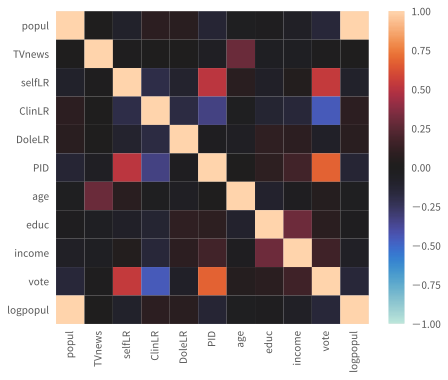

In [5]:
df = df_raw
df = df.corr(method='kendall')
sns.heatmap(df,
            vmin=-1, center=0, vmax=1,
            square=True)
df_corr = df

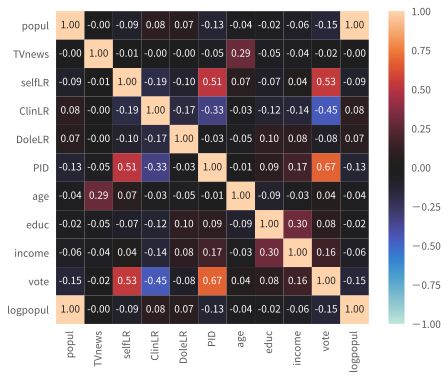

In [6]:
df = df_corr
sns.heatmap(df,
            vmin=-1, center=0, vmax=1,
            square=True, annot=True, fmt='.2f')

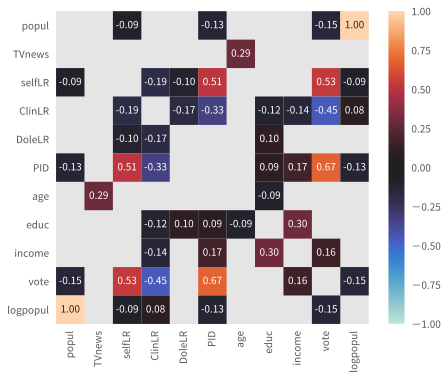

In [7]:
df = df_corr

df_abs = df.abs()
df = (df.mask(df == 1)
        .where(df_abs >= np.nanmedian(df_abs)))

sns.heatmap(df,
            vmin=-1, center=0, vmax=1,
            square=True, annot=True, fmt='.2f')

df_corr_masked = df

In [8]:
import networkx as nx

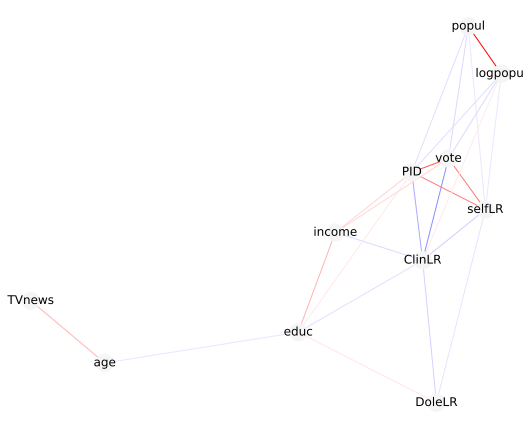

In [9]:
df = df_corr_masked
G = nx.Graph()
G = nx.from_pandas_adjacency(df.fillna(0).abs())
nx.draw(G,
        pos=nx.spring_layout(G, seed=20200501),
        with_labels=True,
        node_color='whitesmoke',
        edge_color=[df[s][t] for s, t in G.edges],
        edge_cmap=plt.cm.bwr, edge_vmin=-1, edge_vmax=1)